# Polynomial Regression Model

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import threading

from numpy import character
from parso.python.tree import String

## Importing Dataset

In [24]:
data = pd.read_csv("/Users/anshumaansoni/PycharmProjects/Machine-Learning/Datasets/Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [26]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Plotting the data

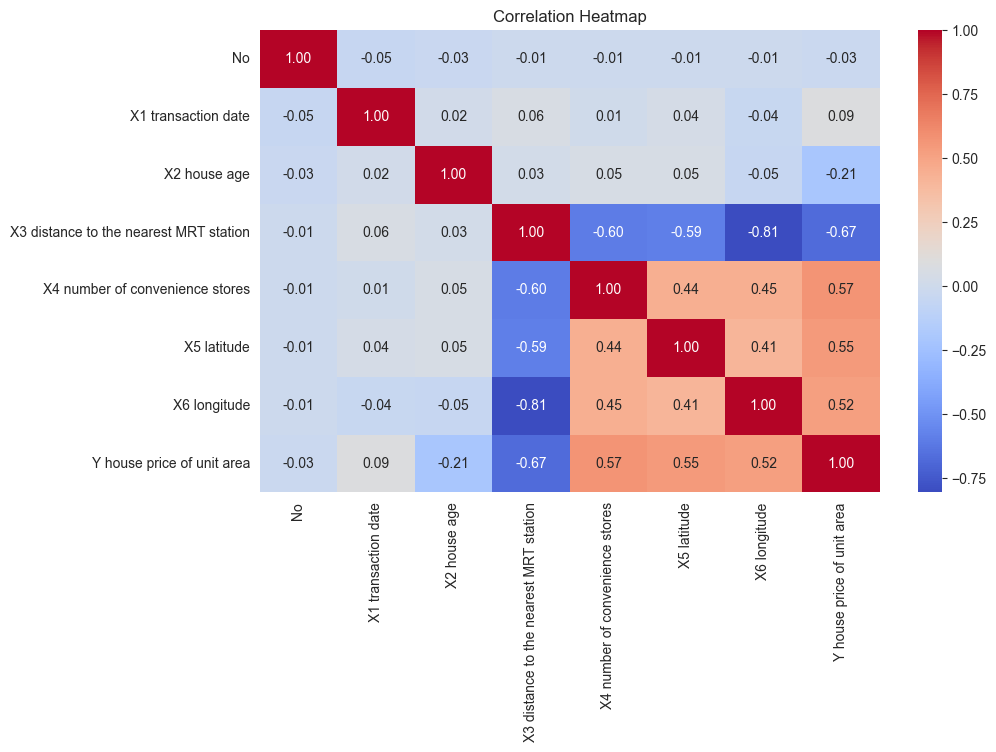

In [27]:
import seaborn as sns

plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Splitting the Variables 

The Variable X4 is mostly corelated with the Y, and so we chose the variable for the Regression

In [28]:
X = data['X5 latitude']
y = data.iloc[:, -1]

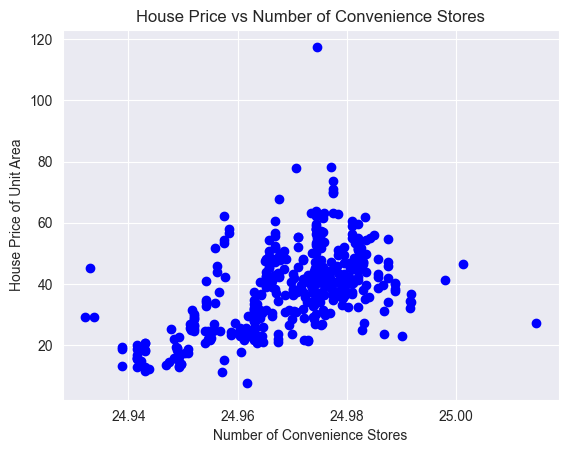

In [29]:
plt.scatter(X, y, color='blue')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.title('House Price vs Number of Convenience Stores')
plt.show()

## Splitting the data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3642)

## Fitting the Polynomial Regression Model

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=30)
X_train_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
X_test_poly = poly.transform(X_test.values.reshape(-1, 1))

model = LinearRegression()
model.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [32]:
y_pred = model.predict(X_test_poly)

## Output Visualisation

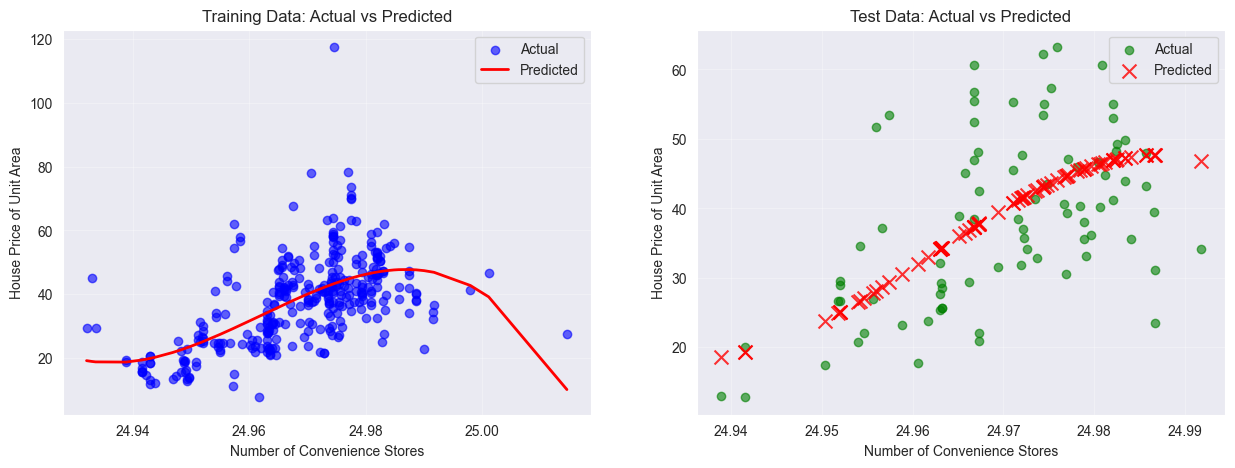

In [33]:
import matplotlib.pyplot as plt

# Create a figure with subplots for training and test data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sort data for smooth plotting
X_train_sorted = np.sort(X_train.values)
X_train_poly_sorted = poly.transform(X_train_sorted.reshape(-1, 1))
y_train_pred_sorted = model.predict(X_train_poly_sorted)

# Plot Training Data
axes[0].scatter(X_train, y_train, color='blue', label='Actual', alpha=0.6)
axes[0].plot(X_train_sorted, y_train_pred_sorted, color='red', linewidth=2, label='Predicted')
axes[0].set_xlabel('Number of Convenience Stores')
axes[0].set_ylabel('House Price of Unit Area')
axes[0].set_title('Training Data: Actual vs Predicted')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot Test Data
axes[1].scatter(X_test, y_test, color='green', label='Actual', alpha=0.6)
axes[1].scatter(X_test, y_pred, color='red', marker='x', s=100, label='Predicted', alpha=0.8)
axes[1].set_xlabel('Number of Convenience Stores')
axes[1].set_ylabel('House Price of Unit Area')
axes[1].set_title('Test Data: Actual vs Predicted')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.show()

## Performance Metrics

In [34]:
# Print model performance metrics
from sklearn.metrics import mean_squared_error, r2_score

train_pred = model.predict(X_train_poly)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {np.sqrt(train_mse):.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"\nTest MSE: {test_mse:.4f}")
print(f"Test RMSE: {np.sqrt(test_mse):.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Training MSE: 120.6652
Training RMSE: 10.9848
Training R² Score: 0.3767

Test MSE: 104.9453
Test RMSE: 10.2443
Test R² Score: 0.2959


In [35]:
print("Polynomial Regression Model Coefficients:")
print(model.coef_)

Polynomial Regression Model Coefficients:
[ 6.43789831e-39 -5.75209780e-40  4.52548004e-44 -8.75811540e-47
 -7.53484932e-63 -2.18016497e-61 -6.01042753e-60 -1.60513003e-58
 -4.18253788e-57 -1.06818268e-55 -2.68152970e-54 -6.62922021e-53
 -1.61580963e-51 -3.88546228e-50 -9.21958736e-49 -2.15835609e-47
 -4.98244442e-46 -1.13308084e-44 -2.53493709e-43 -5.56796609e-42
 -1.19742193e-40 -2.51156133e-39 -5.10986920e-38 -1.00038668e-36
 -1.86161674e-35 -3.22739022e-34 -5.02658448e-33 -6.51107977e-32
 -5.60369105e-31  4.36432979e-32 -8.46962560e-34]


In [36]:
print("Train and Test Scores:")
print(f"Train Score: {model.score(X_train_poly, y_train):.4f}")
print(f"Test Score: {model.score(X_test_poly, y_test):.4f}")

Train and Test Scores:
Train Score: 0.3767
Test Score: 0.2959


# **Model Optimisation**

**A framework to perform Polynomial Regression on dataset over a set range of Degree using multithreading.**

**Usage:**
   * Create an Object Instance of the class ModelOptimizer
   * Call the run() method to start the optimization process
   * Call the getPlots() method to plot the training and test data with the predicted values
   * Call the getPerformanceMetrics() method to get the performance metrics for each degree

**Returns:**
   * getPlots() - returns the Training and Test Data plots comparing between prediction and actual values
   * getPerformanceMetrics() - returns a dataframe containing the performance metrics for each degree

In [37]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import threading

class PolynomialRegression(threading.Thread):
    """
    A class to perform Polynomial Regression Model Optimisation
    The class inherits from threading.Thread, and hence the multiple models can be run simultaneously

    :param degree: The degree of the polynomial model
    :param X: Independent variable
    :param y: Dependent variable
    """
    def __init__(self, degree, X, y):
        super().__init__()
        self.y_pred = None
        self.X_test_poly = None
        self.poly_features = None
        self.X_train_poly = None
        self.X_test = None
        self.X_train = None
        self.y_test = None
        self.y_train = None
        self.degree = degree
        self.model = LinearRegression()
        self.data_split(X, y, 0.2)
        
    def run(self) -> None:
        self.fit()
        self.Evaluation()

    def data_split(self, X: pd.Series , y: pd.Series, r: float) -> None:
        """
        Splits the data into training and test sets

        :param X:
        :param y:
        :param r:
        :return:
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=r, random_state=42)

    def fit(self) -> None:
        """
        Fits the polynomial regression model

        :return:
        """
        self.poly_features = PolynomialFeatures(degree=self.degree)
        self.X_train_poly = self.poly_features.fit_transform(self.X_train.values.reshape(-1, 1))
        self.X_test_poly = self.poly_features.transform(self.X_test.values.reshape(-1, 1))
        self.model.fit(self.X_train_poly, self.y_train)

    def Evaluation(self) -> None:
        """
        Performs evaluation on the test set and calculates performance metrics

        :return:
        """
        self.y_pred = self.model.predict(self.X_test_poly)
        self.rmse = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        self.r2 = r2_score(self.y_test, self.y_pred)
        self.mae = mean_absolute_error(self.y_test, self.y_pred)

    def plot(self) -> None:
        """
        When called plots the training and test data with the predicted values

        :return:
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        X_train_sorted = np.sort(self.X_train.values)
        X_train_poly_sorted = self.poly_features.transform(X_train_sorted.reshape(-1, 1))
        y_train_pred_sorted = self.model.predict(X_train_poly_sorted)

        axes[0].scatter(self.X_train, self.y_train, color='blue', label='Actual', alpha=0.6)
        axes[0].plot(X_train_sorted, y_train_pred_sorted, color='red', linewidth=2, label='Predicted')
        axes[0].set_xlabel('Number of Convenience Stores')
        axes[0].set_ylabel('House Price of Unit Area')
        axes[0].set_title('Training Data: Actual vs Predicted')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        axes[1].scatter(self.X_test, self.y_test, color='green', label='Actual', alpha=0.6)
        axes[1].scatter(self.X_test, self.y_pred, color='red', marker='x', s=100, label='Predicted', alpha=0.8)
        axes[1].set_xlabel('Number of Convenience Stores')
        axes[1].set_ylabel('House Price of Unit Area')
        axes[1].set_title('Test Data: Actual vs Predicted')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        plt.show()


In [38]:
from typing import AnyStr
class ModelOptimizer():
    """
    Wrapper class to perform Polynomial Regression Model Optimisation over a range of Degrees
    performs multithreading to run multiple models simultaneously

    :param X_variable: The name of the variable on which the model is to be trained
    :param Data: The dataset on which the model is to be trained
    :param minDegree: The minimum degree of the polynomial model to be trained
    :param maxDegree: The maximum degree of the polynomial model to be trained
    """
    def __init__(self, X_variable: AnyStr, Data: pd.DataFrame, minDegree: int = 0, maxDegree: int = 100):
        self.PerformanceMetrics = {}
        self.models = {}
        self.X_variable = X_variable
        self.X = Data[X_variable]
        self.y = Data.iloc[:, -1]
        self.minDegree = minDegree
        self.maxDegree = maxDegree
        self.threads = []

    def run(self) -> None:
        """
        perform multithreading to run multiple models simultaneously

        :return:
        """
        for degree in range(self.minDegree, self.maxDegree, 5):
            model = PolynomialRegression(degree, self.X, self.y)
            model.start()
            self.threads.append(model)

        for model in self.threads:
            model.join()

        for model in self.threads:
            degree = model.degree
            self.models[degree] = [model]
            self.PerformanceMetrics[degree] = {"RMSE": model.rmse, "R2": model.r2, "MAE": model.mae}

    def getPerformanceMetrics(self) -> pd.DataFrame:
        """
        Returns a dataframe containing the performance metrics for each degree

        :return pd.DataFrame containing the performance metrics:
        """
        return pd.DataFrame(self.PerformanceMetrics)

    def getPlots(self, deg: float) -> None:
        """
        Creates a plot comparing the actual and predicted values for a given degree

        :param deg:
        :return:
        """
        self.models[deg][0].plot()


### Example Usage of the Optimizer over the X5 Feature

In [39]:
Optimizer = ModelOptimizer(X_variable="X6 longitude", Data=data, minDegree=0, maxDegree=110)
Optimizer.run()

In [40]:
Optimizer.getPerformanceMetrics()

,0,5,10,15,20,25,30,35,40,45,...,60,65,70,75,80,85,90,95,100,105
RMSE,13.113716,9.266081,9.264740,9.263684,9.262501,9.261382,9.260262,9.259142,9.258044,9.256879,...,9.253516,9.252395,9.251287,9.250172,9.249054,9.247949,9.246846,9.245733,9.244630,9.243546
R2,-0.025094,0.488195,0.488343,0.488460,0.488590,0.488714,0.488838,0.488961,0.489083,0.489211,...,0.489582,0.489706,0.489828,0.489951,0.490074,0.490196,0.490318,0.490440,0.490562,0.490681
MAE,10.916747,7.202576,7.201648,7.200934,7.200124,7.199358,7.198588,7.197817,7.197062,7.196257,...,7.193923,7.193141,7.192367,7.191586,7.190800,7.190023,7.189245,7.188458,7.187676,7.186907


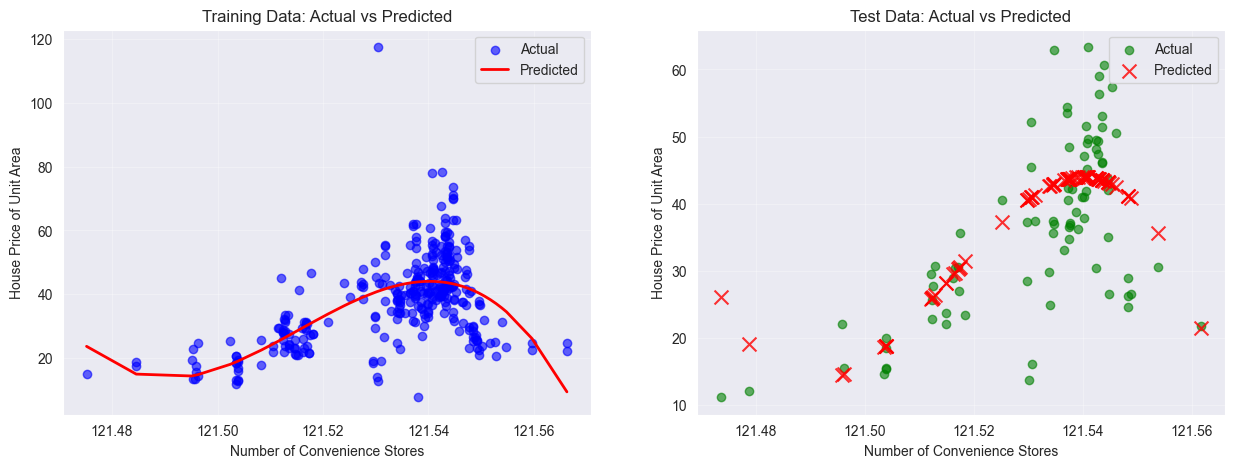

In [43]:
Optimizer.getPlots(95) # Performance Plots for degree 20

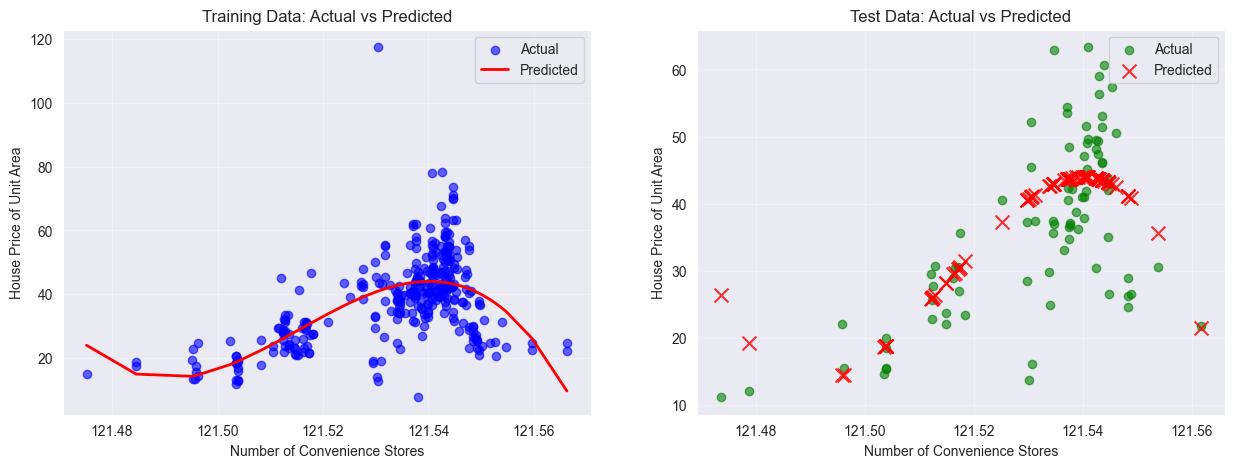

In [42]:
Optimizer.getPlots(30) # Performance Plots for degree 30